# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [5]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [6]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [7]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [41]:
df_train.shape

(15223, 53)

In [9]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [50]:
df_test.shape

(14910, 53)

In [11]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [12]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [13]:
df = df_test.append(df_train).reset_index(drop=True)

In [14]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [15]:
df.info()
LOAN_MAX_DLQ_AM

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [16]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Высшее', 'Неполное среднее', 'Неоконченное высшее', 'Ученая степень', 'Среднее специальное', 'Среднее', 'Два и более высших образования'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Не состоял в браке', 'Разведен(а)', 'Гражданский брак', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'Информационные услуги', 'Ресторанный бизнес/Общественное питание', 'Торговля', 'Образование', 'Энергетика', 'Логистика', 'Подбор персонала', 'Наука', 'Сборочные производства', 'Коммунальное хоз-во/Дорожные службы', 'Другие сферы', 'Юридические услуги/нотариальные услуги', 'Строительство', 'Банк/Финансы', 'Химия/Парфюмерия/Фармацевтика', 'Салоны красоты и здоровья', 'Металлургия/Промышленность/Машиностроение', 'ЧОП/Детективная д-ть', 'Развлечения/Искусство', 'Туризм', 'Страхование', 'Маркетинг', 'СМИ/Реклама/PR-агенства', 'Недвижимость', 'Государственная служба', 'Нефтегазовая промышленность', 'Сельское хозяйство', 'Управляющая компания', 'Здравоохранение', 'Информационные технологии', 'Транспорт'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [17]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [131]:
## CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT - пропусков нет, но нужно также заменить , на .

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [132]:
## EDUCATION, MARITAL_STATUS, GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, FAMILY_INCOME, REG_ADDRESS_PROVINCE, FACT_ADDRESS_PROVINCE, POSTAL_ADDRESS_PROVINCE, TP_PROVINCE, REGION_NM относятся к категориальным признакам и их нужно кодировать

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [179]:
def preproc_data(df_input):
    df_output = df_input.copy()
    df_output = df_output.drop(['AGREEMENT_RK', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM'], axis=1)
    list_change = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    for i in list_change: # заменяем , на . во всех столбцах из списка
        df_output[i] = df_output[i].map(lambda x: x.replace(',', '.')).astype('float')
    df_output = df_output.fillna(0) # упрощенно пока вставляем нули в nan. сделаем лучше чистку через среднее и пол
    ##df_output = df_output.dropna() # плохо работает так как остается только около 550 замеров
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE'])
    return df_output

In [180]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [183]:
df_preproc.T

,0,1,2,3,4,5,6,7,8,9,...,30123,30124,30125,30126,30127,30128,30129,30130,30131,30132
TARGET,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
AGE,30,48,35,22,27,44,57,33,53,33,...,36,31,35,61,39,25,51,22,60,37
SOCSTATUS_WORK_FL,1,0,1,1,1,0,1,1,0,1,...,1,1,1,1,1,1,1,1,0,1
SOCSTATUS_PENS_FL,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
GENDER,1,1,0,0,1,0,1,1,1,0,...,0,1,1,0,1,0,1,1,1,0
CHILD_TOTAL,1,0,1,0,2,2,0,2,2,1,...,0,1,1,0,1,1,2,1,2,2
DEPENDANTS,1,0,0,0,2,2,0,2,0,0,...,0,1,1,0,1,1,0,1,0,0
PERSONAL_INCOME,7000,4100,40000,20000,17000,7000,10000,7500,9000,4000,...,15000,8100,9500,13000,10000,12000,10000,6000,4500,20000
REG_FACT_FL,0,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,0,1,1,1,1
FACT_POST_FL,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1


In [213]:
df_preproc.info() # не ясно почему не отображаются типы данных по столбцам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 203 entries, TARGET to REG_ADDRESS_PROVINCE_Ярославская область
dtypes: float64(7), int64(31), object(1), uint8(164)
memory usage: 13.7+ MB


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [184]:
y = df_train_preproc['TARGET']
X = df_train_preproc.drop(['TARGET'], axis=1)
y_test = df_test_preproc['TARGET']
X_test = df_test_preproc.drop(['TARGET'], axis=1)


#### Задание 5. Обучение и оценка качества разных моделей

In [185]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

X_train, X_train_test, y_train, y_train_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [224]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict_dtc = dtc.predict(X_train_test)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict_rfc = rfc.predict(X_train_test)

from sklearn.linear_model import LogisticRegression


In [225]:
predict_rfc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [228]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score
results_dtc = []
print('precision DTC', precision_score(y_train_test, predict_dtc))
print('recall DTC', recall_score(y_train_test, predict_dtc))
print('accuracy DTC', accuracy_score(y_train_test, predict_dtc))
results_dtc.append(precision_score(y_train_test, predict_dtc))
results_dtc.append(recall_score(y_train_test, predict_dtc))
results_dtc.append(accuracy_score(y_train_test, predict_dtc))
print(results_dtc, '\n')

results_rfc = []
print('precision RFC', precision_score(y_train_test, predict_rfc))
print('recall RFC', recall_score(y_train_test, predict_rfc))
print('accuracy RFC', accuracy_score(y_train_test, predict_rfc))
results_rfc.append(precision_score(y_train_test, predict_rfc))
results_rfc.append(recall_score(y_train_test, predict_rfc))
results_rfc.append(accuracy_score(y_train_test, predict_rfc))
print(results_rfc, '\n')



precision DTC 0.16055846422338568
recall DTC 0.16576576576576577
accuracy DTC 0.7932997591416685
[0.16055846422338568, 0.16576576576576577, 0.7932997591416685] 

precision RFC 0.2727272727272727
recall RFC 0.010810810810810811
accuracy RFC 0.8762864024523758
[0.2727272727272727, 0.010810810810810811, 0.8762864024523758] 



In [227]:
predict_dtc

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

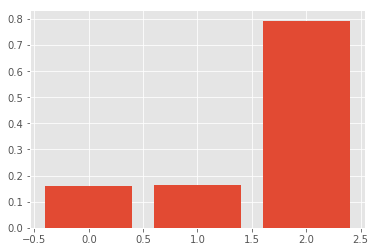

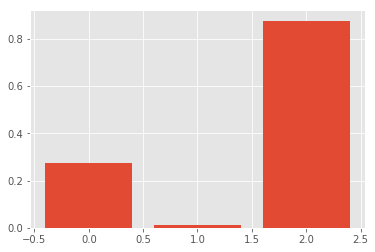

In [232]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

plt.bar(range(3), results_dtc)
plt.show()
plt.bar(range(3), results_rfc)
plt.show()

(-0.01, 1.01)

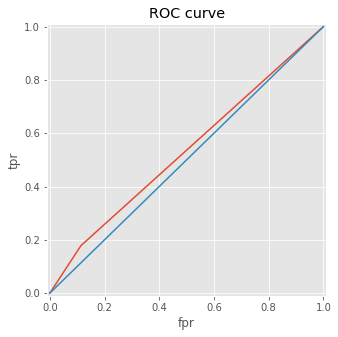

In [209]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_train_test, predict_dtc)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))


In [ ]:
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

## Your Code Here

In [ ]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки


## Your Code Here

In [ ]:
# Померить roc_auc на тесте
